<a href="https://colab.research.google.com/github/Shabbaz-Hussein/First-LR-Model/blob/main/Linear_Regression_Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Dataset I'll be using
import pandas as pd
malaki = pd.read_csv('/content/road_accidents_data.csv')
print("Dataset shape = ", malaki.shape)
malaki.head()

Dataset shape =  (15, 4)


,Number of Accidents,Vehicle Condition (years),Road Type,Weather Conditions
0,12,2,Highway,Clear
1,20,10,City Street,Rainy
2,7,5,Rural Road,Foggy
3,15,3,City Street,Clear
4,18,15,Highway,Snowy


In [5]:
#Data to be focused on
data= malaki.loc[:,['Number of Accidents','Vehicle Condition (years)']]
data.head(7)
#Number of Accidents will depend on the codition of the vehicle in ths scenario

,Number of Accidents,Vehicle Condition (years)
0,12,2
1,20,10
2,7,5
3,15,3
4,18,15
5,25,7
6,10,4


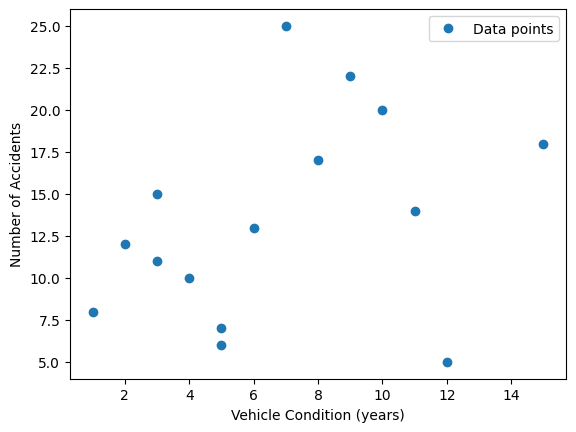

In [8]:
#visualization
import matplotlib.pyplot as plt
malaki.plot (x='Vehicle Condition (years)', y='Number of Accidents', style = 'o', label ='Data points')
plt.xlabel('Vehicle Condition (years)')
plt.ylabel('Number of Accidents')
plt.show()

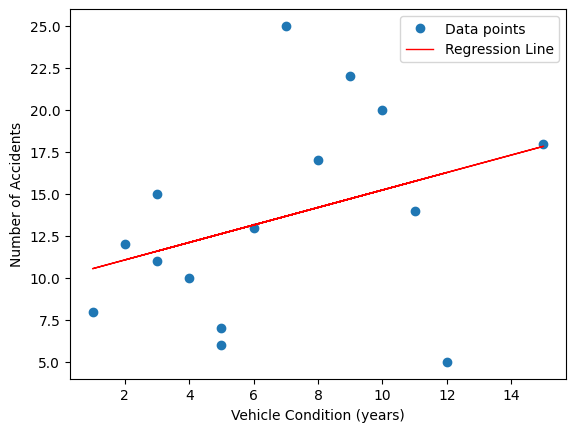

In [11]:
#Adding the regression line
from sklearn.linear_model import LinearRegression
X = malaki[['Vehicle Condition (years)']]
y = malaki['Number of Accidents']
regressor= LinearRegression()
regressor.fit(X, y)
malaki.plot (x='Vehicle Condition (years)', y='Number of Accidents', style = 'o', label ='Data points')
plt.plot(X, regressor.predict(X), color='r', linewidth=1, label='Regression Line')
plt.xlabel('Vehicle Condition (years)')
plt.ylabel('Number of Accidents')
plt.legend()
plt.show()

In [12]:
#Dividing data into dependent and independent variables
x = pd.DataFrame(data['Vehicle Condition (years)'])
y = pd.DataFrame(data['Number of Accidents'])

#Splitting data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Shape of tratin and test sets
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12, 1)
(3, 1)
(12, 1)
(3, 1)


In [14]:
#Training the algorithm
regressor.fit(x_train, y_train)

#Retrieve intercept and slope
print('Intercept = ', regressor.intercept_)
print('Slope = ', regressor.coef_)

Intercept =  [9.28432732]
Slope =  [[0.75450763]]


In [15]:
#Predictions
y_pred = regressor.predict(x_test)
print(y_pred)

[[16.82940361]
 [12.30235784]
 [18.33841886]]


In [20]:
#Actual values
print(y_test)

   Number of Accidents
1                   20
6                   10
8                    5


In [24]:
#Evaluating the algorithm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.270457697642164
Mean Squared Error: 64.4223169520424
Root Mean Squared Error: 8.026351409703066


In [25]:
#Saving
import joblib
joblib.dump(regressor, 'LRM1.pkl')

['LRM1.pkl']

In [27]:
#Using trained LRM1 model

#sample x values for prediction
sample= np.array([5,6,7,8,9]).reshape(-1,1)
#Loading model then make predictions
model= joblib.load('LRM1.pkl')
pred= model.predict(sample)

#creating a dataframe with 1D arrays
new_data= pd.DataFrame({'Car_Age': sample.flatten(), 'predictions': pred.flatten()})

print(new_data)

   Car_Age  predictions
0        5    13.056865
1        6    13.811373
2        7    14.565881
3        8    15.320388
4        9    16.074896


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
